In [6]:
import word2vec
import trnn_utils as U
from trnn_main import *
import matplotlib.pyplot as plt

#### PA-I nad PA-II please see the code source files

### PA-III-1 and PA-III-2

In [13]:
# load datasets
input_data = U.input_data()

all_data, train_data, test_data = input_data.load_text_data()
train_data_x = torch.from_numpy(np.array(train_data[0])) # map content by id
train_data_y = torch.from_numpy(np.array(train_data[1]))
test_data_x = torch.from_numpy(np.array(test_data[0])) # map content by id
test_data_y = torch.from_numpy(np.array(test_data[1]))

word_embed = input_data.load_word_embed()

# model train (model test function can be called directly in model_train)
train_loss_list, accuracies = model_train(all_data, word_embed, train_data_x, train_data_y, test_data_x, test_data_y)

Trainning accurary at iteration 1 is:  42.04023443687629
Trainning loss at iteration 1 is:  1.4429721524141517
Trainning accurary at iteration 2 is:  50.1188024710914
Trainning loss at iteration 2 is:  1.3445454127725056
Trainning accurary at iteration 3 is:  54.72833834943767
Trainning loss at iteration 3 is:  1.2913385630962508
Trainning accurary at iteration 4 is:  57.1519087597022
Trainning loss at iteration 4 is:  1.252479598162671
Trainning accurary at iteration 5 is:  58.60921907175669
Trainning loss at iteration 5 is:  1.2275774141501368
Trainning accurary at iteration 6 is:  59.95564707745921
Trainning loss at iteration 6 is:  1.208969185184505
Trainning accurary at iteration 7 is:  59.432916204657054
Trainning loss at iteration 7 is:  1.193577493929465
Trainning accurary at iteration 8 is:  61.31791541264058
Trainning loss at iteration 8 is:  1.1819565063334525
Trainning accurary at iteration 9 is:  61.09615079993664
Trainning loss at iteration 9 is:  1.1731125603783623
Train

#### Seems the accurary converges around 64% and the final test accuracy is about 64.5%. We can visualize the accuracy curve:

Text(0, 0.5, 'Trainning Accuracy')

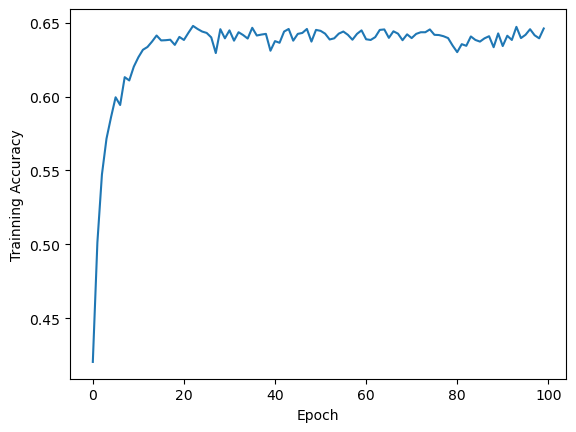

In [39]:
ax = plt.plot([x/100.0 for x in accuracies])
plt.xlabel("Epoch")
plt.ylabel("Trainning Accuracy")

#### Of course this is the "choice 1" as described in the following PA-III-3. So I will try the "choice 2" subsequently:

### PA-III-3

#### For the first choice that uses the last hidden state as output, the PA-III-2's result can be used.
#### For the second choice, simply changing the forward function to be as follow (other keep the same):

In [16]:
def forward(self, id_batch):
    # id_batch: use id_batch (paper ids in this batch) to obtain paper conent of this batch
    x_batch = []
    for id in id_batch:
        row = self.X[id.int()]
        p = np.zeros((100, 128))
        count = 0
        for w in row:
            p[count] = self.embed[w]
            count+=1
        x_batch.append(torch.from_numpy(p).to("cuda:0"))

    x_batch = torch.stack(x_batch)
    x_batch = x_batch.to(torch.float64).to("cuda:0")

    output = torch.zeros(x_batch.shape[0], 64, dtype=torch.float64).to("cuda:0")
    hx = torch.randn(x_batch.shape[0], 64, dtype=torch.float64).to("cuda:0")
    cx = torch.randn(x_batch.shape[0], 64, dtype=torch.float64).to("cuda:0")
    for i in range(x_batch.shape[1]):
        hx, cx = self.lstmcell(x_batch[:,i,:], (hx, cx))
        # accumulate the hidden layers
        output = output + hx

    ## calculate the average for all hidden layers
    output = output / x_batch.shape[0]
    x = self.layer1(output)
    x = self.layer1(outputs[-1])
    x = self.relu(x)
    x = self.layer2(x)
    x = self.sigmoid(x)
    return x

#### Then we re-run the model trainning and prediction:

In [9]:
# load datasets
input_data = U.input_data()

all_data, train_data, test_data = input_data.load_text_data()
train_data_x = torch.from_numpy(np.array(train_data[0])) # map content by id
train_data_y = torch.from_numpy(np.array(train_data[1]))
test_data_x = torch.from_numpy(np.array(test_data[0])) # map content by id
test_data_y = torch.from_numpy(np.array(test_data[1]))

word_embed = input_data.load_word_embed()

# model train (model test function can be called directly in model_train)
train_loss_list, accuracies = model_train(all_data, word_embed, train_data_x, train_data_y, test_data_x, test_data_y)

Trainning accurary at iteration 1 is:  53.66703627435451
Trainning loss at iteration 1 is:  1.3669944460913184
Trainning accurary at iteration 2 is:  54.74417867891652
Trainning loss at iteration 2 is:  1.2642932438048242
Trainning accurary at iteration 3 is:  59.92396641850151
Trainning loss at iteration 3 is:  1.2286254486303094
Trainning accurary at iteration 4 is:  61.333755742119436
Trainning loss at iteration 4 is:  1.1960889772543823
Trainning accurary at iteration 5 is:  62.775225724695076
Trainning loss at iteration 5 is:  1.1775193778959343
Trainning accurary at iteration 6 is:  64.43846031997465
Trainning loss at iteration 6 is:  1.1603167212180634
Trainning accurary at iteration 7 is:  63.994931094566766
Trainning loss at iteration 7 is:  1.1441368966802046
Trainning accurary at iteration 8 is:  64.31173768414384
Trainning loss at iteration 8 is:  1.1332389909215654
Trainning accurary at iteration 9 is:  64.86614921590369
Trainning loss at iteration 9 is:  1.122258453180551

Text(0.5, 1.0, 'Another choice: LSTM Using the average of hidden layer as the output')

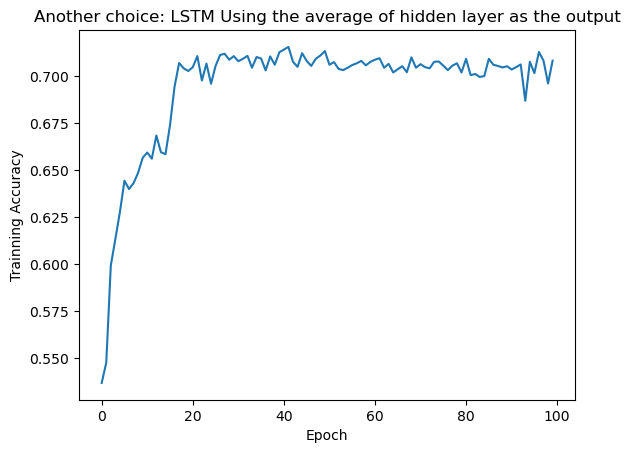

In [10]:
ax = plt.plot([x/100.0 for x in accuracies])
plt.xlabel("Epoch")
plt.ylabel("Trainning Accuracy")
plt.title("Another choice: LSTM Using the average of hidden layer as the output")

#### It looks that the 2th choice that uses an average of hidden layer as the output performs better than the 1th choice which only uses the last hidden layer. The 2th choice's trainning accuracy congerges around 70% and ends up with the test accuracy 70.6% whereas the 1th choice's test accuracy is only about 64.5% 